# Naive Bayes Classifier

Naive Bayes is a probabilistic machine learning model based on **Bayes' Theorem**.

### Bayes' Theorem
$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

- **P(A|B):** Probability of Event A given B has occurred (Posterior).
- **P(B|A):** Probability of Event B given A has occurred (Likelihood).
- **P(A):** Probability of Event A (Prior).
- **P(B):** Probability of Event B (Evidence).

### Why "Naive"?
It assumes that all features are **independent** of each other. 
Example: If a patient has High Blood Pressure and High Glucose, Naive Bayes assumes these two are unrelated, which is rarely true in biology, but the model still performs remarkably well.

## Gaussian Naive Bayes (Continuous Data)
Used when features are continuous numbers (like Blood Pressure, BMI). It assumes the data follows a Normal (Bell) Distribution.

**Dataset:** Pima Indians Diabetes Database
Predict whether a patient has diabetes based on diagnostic measurements.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import urllib.request

# Download Pima Indians Diabetes Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_path = "pima-indians-diabetes.csv"

if not os.path.exists(data_path):
    urllib.request.urlretrieve(url, data_path)

df_diabetes = pd.read_csv(data_path, names=cols)
print(f"Dataset Shape: {df_diabetes.shape}")
df_diabetes.head()

Dataset Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


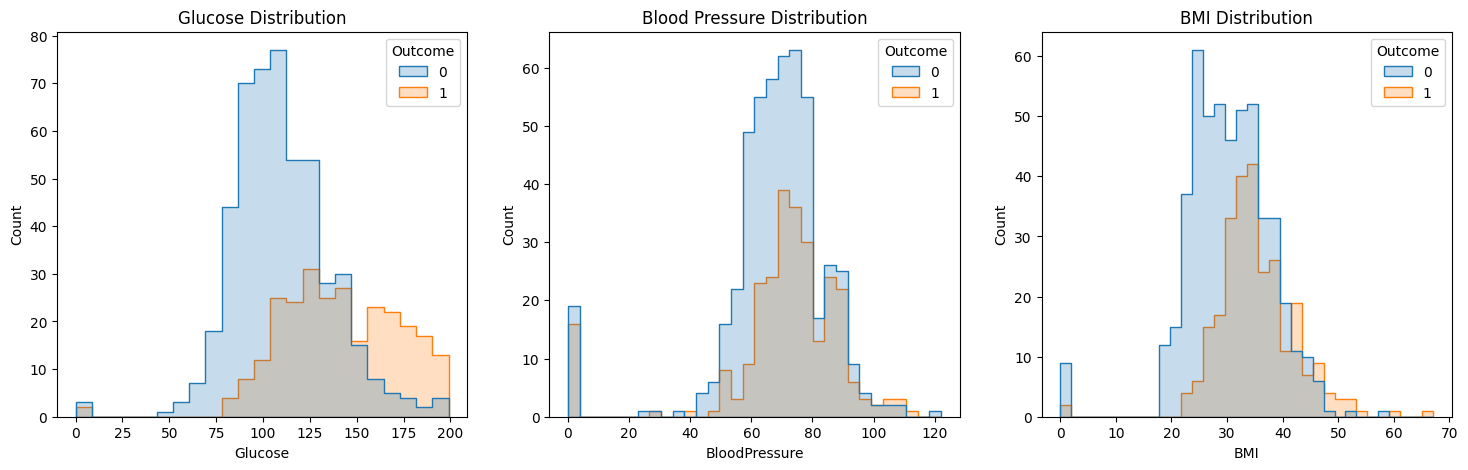

In [4]:
# Visualize the distributions (Assumption Check)
# Gaussian NB assumes these follow a bell curve.

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_diabetes, x='Glucose', hue='Outcome', element='step', ax=axes[0])
axes[0].set_title('Glucose Distribution')

sns.histplot(df_diabetes, x='BloodPressure', hue='Outcome', element='step', ax=axes[1])
axes[1].set_title('Blood Pressure Distribution')

sns.histplot(df_diabetes, x='BMI', hue='Outcome', element='step', ax=axes[2])
axes[2].set_title('BMI Distribution')

plt.show()

In [5]:
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(f"Gaussian Naive Bayes Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Gaussian Naive Bayes Accuracy: 0.7446

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



## Multinomial Naive Bayes (Text Data - Spam)
Used when features are discrete **counts** (e.g., how many times 'Free' appears).

We will download the SMS Spam Collection.

In [6]:
import zipfile
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Download Dataset (SMS Spam)
url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_nb.zip"
extract_path = "sms_spam_nb_data"

if not os.path.exists(zip_path):
    urllib.request.urlretrieve(url, zip_path)

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

file_path = os.path.join(extract_path, "SMSSpamCollection")
df_spam = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])
df_spam['label'] = df_spam['label'].map({'ham': 0, 'spam': 1})

# Vectorization (Count Counts!)
cv = CountVectorizer(stop_words='english')
X_text = cv.fit_transform(df_spam['message'])
y_text = df_spam['label']

X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y_text, test_size=0.2, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train_text, y_train_text)
pred_mnb = mnb.predict(X_test_text)

print(f"Multinomial NB Accuracy: {accuracy_score(y_test_text, pred_mnb):.4f}")

Multinomial NB Accuracy: 0.9830


## Bernoulli Naive Bayes (Binary Data - Spam)
Used when features are **binary** (Present/Absent). It doesn't care *how many* times a word appears, just *if* it appears.

We use the same data, but change the vectorizer to `binary=True`.

In [7]:
from sklearn.naive_bayes import BernoulliNB

# Vectorization (Binary Presence!)
cv_binary = CountVectorizer(stop_words='english', binary=True)
X_binary = cv_binary.fit_transform(df_spam['message'])

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_text, test_size=0.2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train_bin)
pred_bnb = bnb.predict(X_test_bin)

print(f"Bernoulli NB Accuracy: {accuracy_score(y_test_bin, pred_bnb):.4f}")

Bernoulli NB Accuracy: 0.9794


### Comparison & Conclusion
- **Gaussian:** Best for continuous data (Measurements).
- **Multinomial:** Usually best for text classification because frequency matters (e.g., "Very Very Very Good" is stronger than "Very Good").
- **Bernoulli:** Good for short texts text where simple keyword presence is the main signal.